# Diagrams for RTN-016

These diagrams require PlantUML, which can be obtained [here](https://plantuml.com).

In [1]:
PLANTUML_JAR = "/home/s1/neilsen/plantuml/plantuml.jar"

In [1]:
import subprocess
from IPython.core.magic import register_cell_magic
from IPython.display import SVG, Image
from os.path import splitext


@register_cell_magic
def plantuml(line, cell):
    line_elems = line.split()
    out_fname = line_elems[0]
    diagram_type = "uml" if len(line_elems) < 2 else line_elems[1]

    out_base, out_ext = splitext(out_fname)
    if out_ext == "":
        out_ext = ".png"

    out_format = out_ext[1:]

    display_class = {"svg": SVG, "png": Image}
    DisplayClass = display_class[out_format]

    out_format = "svg" if DisplayClass == SVG else "png"

    markup_fname = out_base + ".plantuml"
    figure_fname = out_base + out_ext
    plantuml_markup = cell

    with open(markup_fname, "w") as fp:
        fp.write(f"@start{diagram_type}\n")
        fp.write(plantuml_markup)
        fp.write(f"\n@end{diagram_type}\n")

    run_args = [
        "xvfb-run",
        "java",
        "-jar",
        "/home/s1/neilsen/plantuml/plantuml.jar",
        f"-t{out_format}",
        markup_fname,
    ]
    _ = subprocess.run(run_args)

    result = DisplayClass(filename=figure_fname)
    return result


del plantuml

## Report data flow

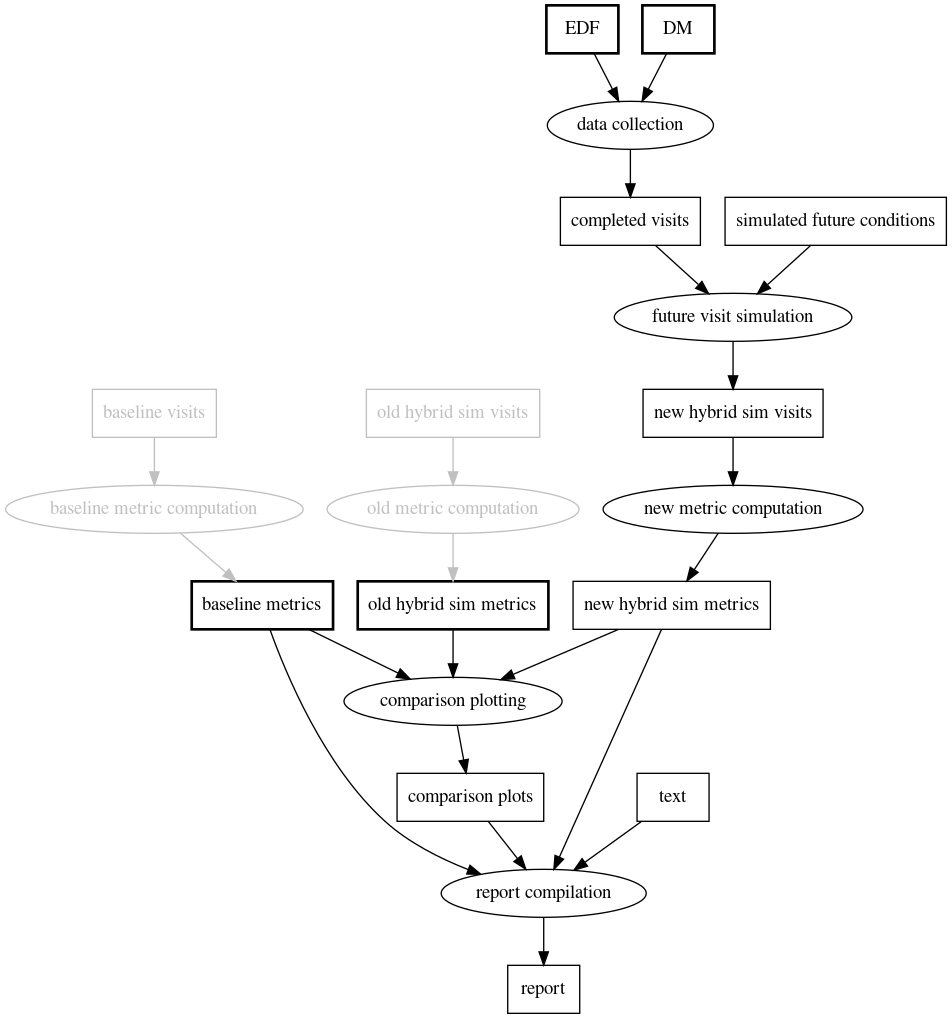

In [36]:
%%plantuml reportdfd dot

digraph reportdfd {
    rankdir=TB;
    node [shape=box];
    
    baseline[label="baseline visits", color="gray", fontcolor="gray"]
    baseline_metrics[label="baseline metrics", penwidth=2]
    visits[label="completed visits"]
    sims[label="new hybrid sim visits"]
    conditions[label="simulated future conditions"]
    new_metrics[label="new hybrid sim metrics"]
    comparison_plots[label="comparison plots"]
    EDF[penwidth=2]
    DM[penwidth=2]
    prev_sims[label="old hybrid sim visits", color="gray", fontcolor="gray"]
    prev_metrics[label="old hybrid sim metrics", penwidth=2]   
    
    data_collection[label="data collection", shape=ellipse]
    visit_simulation[label="future visit simulation", shape=ellipse]
    maf[label="new metric computation", shape=ellipse]
    old_maf[label="old metric computation", shape=ellipse, color="gray", fontcolor="gray"]
    base_maf[label="baseline metric computation", shape=ellipse, color="gray", fontcolor="gray"]
    comparison_plotting[label="comparison plotting", shape=ellipse]
    reporting[label="report compilation", shape=ellipse]
    
    EDF -> data_collection
    DM -> data_collection
    data_collection -> visits
    
    visits -> visit_simulation
    conditions -> visit_simulation
    visit_simulation -> sims
    
    sims -> maf
    maf -> new_metrics
    
    baseline -> base_maf [color="gray"]
    base_maf -> baseline_metrics [color="gray"]
    
    prev_sims -> old_maf [color="gray"]
    old_maf -> prev_metrics [color="gray"]
    
    baseline_metrics -> comparison_plotting
    prev_metrics -> comparison_plotting
    new_metrics -> comparison_plotting
    comparison_plotting -> comparison_plots
    
    baseline_metrics -> reporting
    new_metrics -> reporting
    comparison_plots -> reporting
    text -> reporting
    reporting -> report
    
}